<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./Project_1_used_datasource/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./Project_1_used_datasource/rainy_days_to_ridership.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./Project_1_used_datasource/rainfall-monthly-number-of-rain-days.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

Data used:
* data\rainfall-monthly-number-of-rain-days.csv

External dataset:
* PT_Ridership_Monthly_2019-2022: data\PT_Ridership_Monthly_2019-2022.pdf (LTA | Statistics, n.d.) LTA | Statistics. (n.d.). https://www.lta.gov.sg/content/ltagov/en/who_we_are/statistics_and_publications/statistics.html

## Problem Statement

Problem statement: Weather and Public Transportation.

Showcase the plans for a simplified mobile application for real-time weather-based updates on public transportation delays and disruptions. How can this simplified application assist people in making more informed decisions for their rainy day commutes?

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Source used: https://www.sciencedirect.com/science/article/abs/pii/S0968090X16302492 (Zhou et al., 2017)

Zhou, M., Wang, D., Li, Q., Yue, Y., Tu, W., & Cao, R. (2017, February 1). Impacts of weather on public transport ridership: Results from mining data from different sources. Transportation Research Part C-emerging Technologies; Elsevier BV. https://doi.org/10.1016/j.trc.2016.12.001

While the document used seems to apply for the Shenzhen provience of China, most of the means that they have done for that region can also be applied to Singapore's climate and the ridership on the various MRT, SBS, etc, etc.


### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def mean_cal(mean_list):
    total_sum = 0
    for num in mean_list:
        total_sum += num

    if len(mean_list) > 0:
        mean = total_sum / len(mean_list)
        return mean
    else:
        return None

# Example usage with input list
my_list = [1, 2, 3, 4, 5]
result = mean_cal(my_list)
print("Mean:", result)

Mean: 3.0


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def calculate_standard_deviation(data):
    mean = mean_cal(data)
    squared_diff = [(x - mean) ** 2 for x in data]
    variance = sum(squared_diff) / len(data)
    std_deviation = variance ** 0.5
    # Add error handling for very low or zero standard deviation
    if std_deviation < 0.0001:  # Adjust this threshold as needed
        return None
    return std_deviation

# Example usage with input data
input_data = my_list
result_std_dev = calculate_standard_deviation(input_data)
print("Standard Deviation:", result_std_dev)

Standard Deviation: 1.4142135623730951


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [4]:
df1 = pd.read_csv('data/rainfall-monthly-number-of-rain-days.csv')
df2 = pd.read_csv('data/Project-1-data (PT Ridership Monthly 2019-2022).csv')

In [5]:
df1.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [6]:
df2.head()

,month,public_bus,mrt,lrt,total_ridership
0,2019-01,4250,3462,218,7930
1,2019-02,4010,3248,206,7464
2,2019-03,4111,3383,209,7703
3,2019-04,4189,3400,213,7802
4,2019-05,4199,3359,215,7773


In [7]:
df_rainy_ridership = pd.merge(df1, df2, on = ['month'], how ="inner")

In [8]:
df_rainy_ridership.head()

,month,no_of_rainy_days,public_bus,mrt,lrt,total_ridership
0,2019-01,9,4250,3462,218,7930
1,2019-02,5,4010,3248,206,7464
2,2019-03,6,4111,3383,209,7703
3,2019-04,9,4189,3400,213,7802
4,2019-05,13,4199,3359,215,7773


In [9]:
df_rainy_ridership.isna().sum()

month               0
no_of_rainy_days    0
public_bus          0
mrt                 0
lrt                 0
total_ridership     0
dtype: int64

In [10]:
df_rainy_ridership.shape

(44, 6)

In [11]:
df_rainy_ridership.dtypes

month               object
no_of_rainy_days     int64
public_bus           int64
mrt                  int64
lrt                  int64
total_ridership      int64
dtype: object

In [12]:
# Rename columns
df_rainy_ridership = df_rainy_ridership.rename(columns={
    'month': 'month',
    'no_of_rainy_days': 'rainy_days',
    'public_bus': 'bus',
    'mrt': 'mrt',
    'lrt': 'lrt',
    'total_ridership': 'ridership'
})
# Assuming df3 is your combined DataFrame
df_rainy_ridership.to_csv('Data/rainy_days_to_ridership.csv', index=False)
df_rainy_ridership.head()

,month,rainy_days,bus,mrt,lrt,ridership
0,2019-01,9,4250,3462,218,7930
1,2019-02,5,4010,3248,206,7464
2,2019-03,6,4111,3383,209,7703
3,2019-04,9,4189,3400,213,7802
4,2019-05,13,4199,3359,215,7773


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**Data Dictionary for Ridership Dataset**

| **Feature Name**  | **Data Type** | **Description**                                         |
|-------------------|---------------|---------------------------------------------------------|
| `month`           | Object (str)  | The month for which the ridership data is recorded.    |
| `no_of_rainy_days`| Integer       | The number of rainy days in the given month.           |
| `bus`             | Integer       | Total ridership for public buses in the month (in thousands).        |
| `mrt`             | Integer       | Total ridership for Mass Rapid Transit (MRT) in the month (in thousands). |
| `lrt`             | Integer       | Total ridership for Light Rail Transit (LRT) in the month (in thousands). |
| `total_ridership` | Integer       | The combined total ridership for all modes of transportation in the month (in thousands). |

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [13]:
#Summary Statistics:
summary_stats = df_rainy_ridership.describe()
# Display the summary statistics
summary_stats

,rainy_days,bus,mrt,lrt,ridership
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,13.727273,3339.818182,2519.613636,168.318182,6027.750000
std,5.345564,699.837000,724.967592,38.327095,1457.054868
min,2.000000,1187.000000,602.000000,47.000000,1836.000000
25%,9.000000,2973.500000,2064.250000,147.000000,5131.000000
50%,14.000000,3415.500000,2444.500000,172.500000,6024.500000
75%,17.000000,3882.500000,3250.000000,197.250000,7326.000000
max,24.000000,4300.000000,3551.000000,218.000000,8069.000000


In [14]:
# Define the standard deviation calculation function
sd = {col: calculate_standard_deviation(df_rainy_ridership[col]) for col in df_rainy_ridership.columns if pd.api.types.is_numeric_dtype(df_rainy_ridership[col])}

# Display the resulting dictionary of standard deviations
sd

{'rainy_days': 5.284469683394044,
 'bus': 691.8386002243086,
 'mrt': 716.6819763804551,
 'lrt': 37.88905618397477,
 'ridership': 1440.402265861867}

Of all public transport numbers, it appears that LRT ridership varies the least at only 37 riders away from the mean. This is attributed to LRT having the least number of daily riders monthly at about 2.5%.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


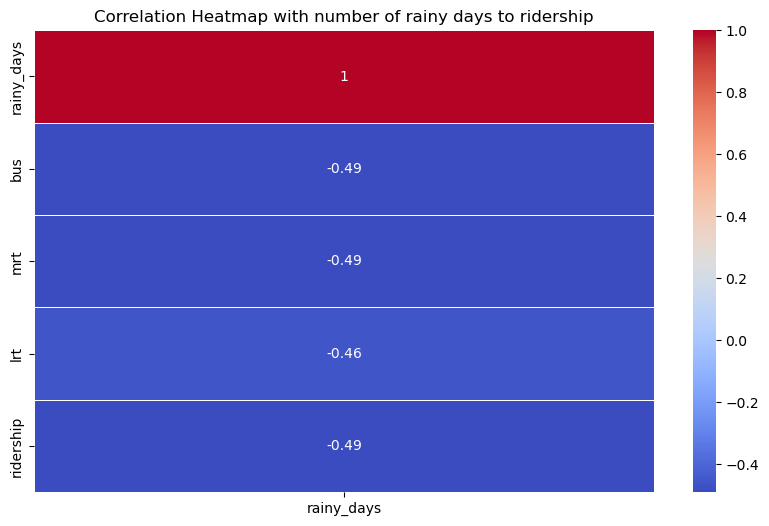

In [15]:
# Select the columns you want to include in the correlation calculation
columns_to_correlate = df_rainy_ridership[['rainy_days', 'bus', 'mrt', 'lrt', 'ridership']]

# Create a heatmap for the correlation of 'rainy_days' with other variables
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(columns_to_correlate.corr()[['rainy_days']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap with number of rainy days to ridership")
plt.savefig("Generated images/heatmap (rainy_days_to_ridership).png")
plt.show()

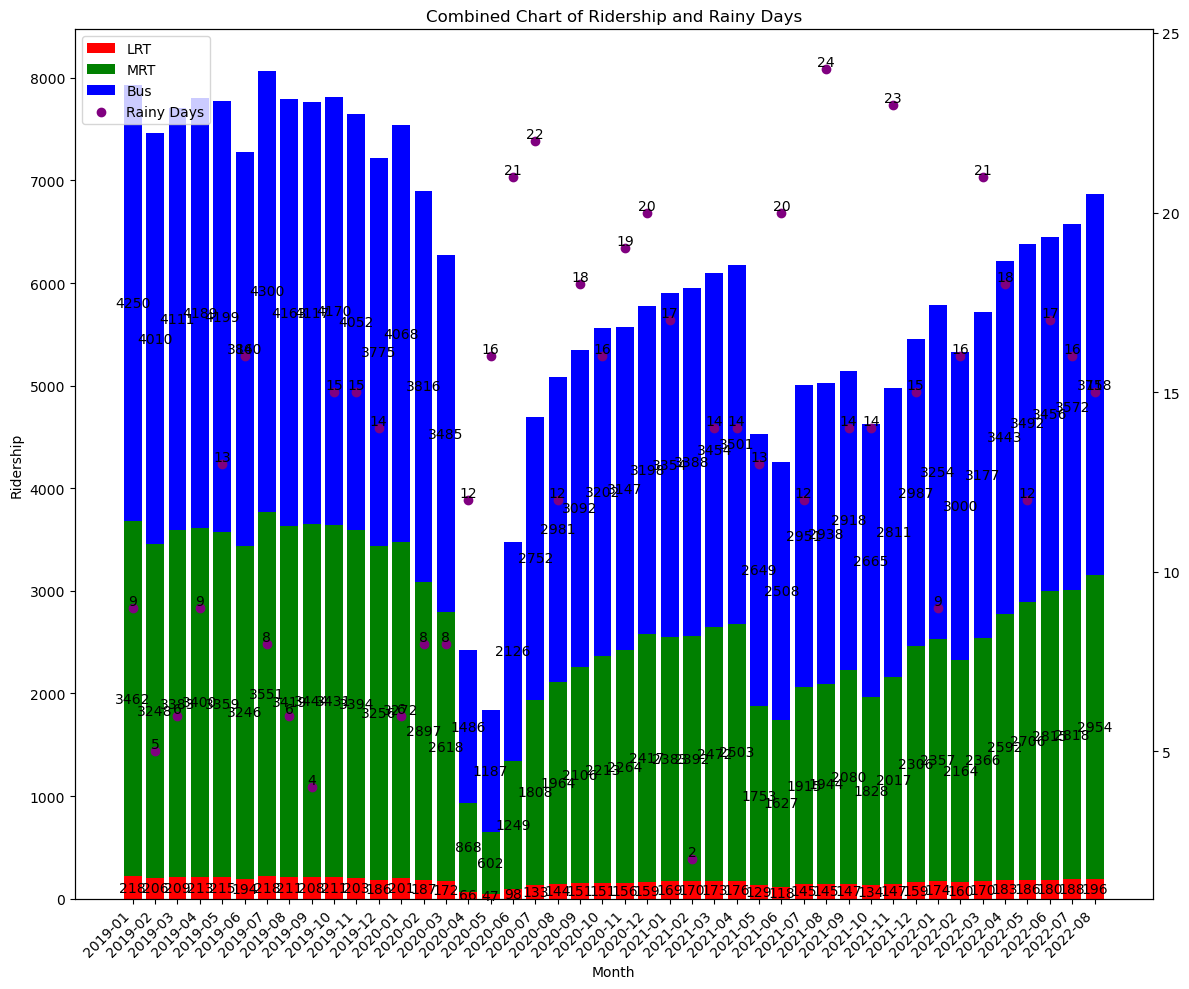

In [17]:
# Create a figure with a single set of axes
fig, ax1 = plt.subplots(figsize=(12, 10))

# Stacked column chart for "lrt," "mrt," and "bus"
months = df_rainy_ridership['month']
lrt = df_rainy_ridership['lrt']
mrt = df_rainy_ridership['mrt']
bus = df_rainy_ridership['bus']
bars_lrt = ax1.bar(months, lrt, label='LRT', color='red')
bars_mrt = ax1.bar(months, mrt, bottom=lrt, label='MRT', color='green')
bars_bus = ax1.bar(months, bus, bottom=[i+j for i,j in zip(lrt, mrt)], label='Bus', color='blue')

# Labels for the stacked bars (centered within the bars)
for bar, h_lrt, h_mrt, h_bus in zip(bars_lrt, lrt, mrt, bus):
    total_height = h_lrt + h_mrt + h_bus
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        h_lrt / 2,
        f"{int(h_lrt)}",
        ha='center',
        va='center',
        fontsize=10,
        color='black',
    )
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        h_lrt + h_mrt / 2,
        f"{int(h_mrt)}",
        ha='center',
        va='center',
        fontsize=10,
        color='black',
    )
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        total_height - h_bus / 2,
        f"{int(h_bus)}",
        ha='center',
        va='center',
        fontsize=10,
        color='black',
    )

# Set labels and title for the primary y-axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Ridership')
ax1.set_title('Combined Chart of Ridership and Rainy Days')

# Create a secondary y-axis for the scatterplot
ax2 = ax1.twinx()

# Scatterplot for "rainy_days" on the secondary y-axis
ax2.scatter(df_rainy_ridership['month'], df_rainy_ridership['rainy_days'], label='Rainy Days', marker='o', color='purple')

# Labels for the scatterplot data points (above the points)
for x, y in zip(df_rainy_ridership['month'], df_rainy_ridership['rainy_days']):
    ax2.text(x, y, f"{y}", ha='center', va='bottom', fontsize=10)

# Adjust the x-axis labels
ax1.set_xticks(months)
ax1.set_xticklabels(months, rotation=45, ha='right')

# Adjust the legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust spacing
plt.tight_layout()

# Save the figure and show the plot
plt.savefig('Generated images/Combined_Chart_with_Secondary_Axis_Labels.png', dpi=300, bbox_inches='tight')
plt.show()

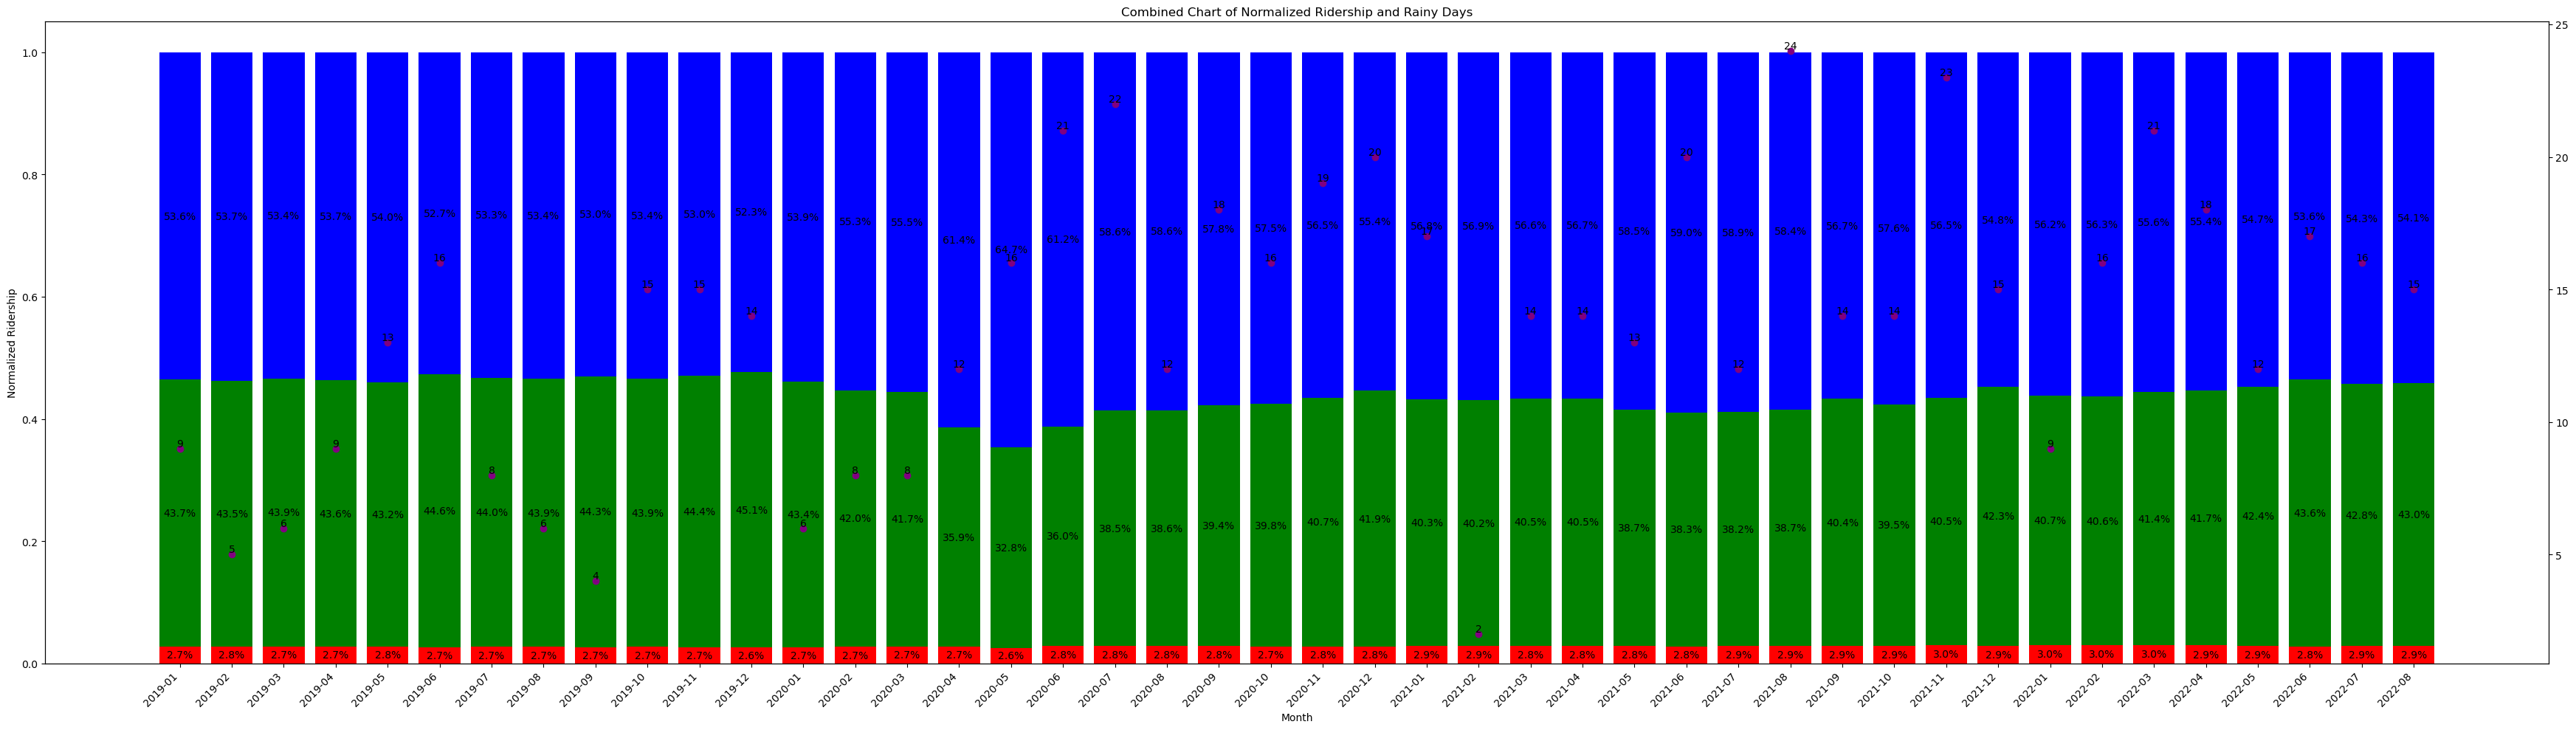

In [18]:
# Normalize the data to make each bar reach the top
df_normalized = df_rainy_ridership[['bus', 'mrt', 'lrt']].div(df_rainy_ridership['ridership'], axis=0)

# Create a figure with a single set of axes
fig, ax1 = plt.subplots(figsize=(35, 10))

# Stacked column chart for normalized "lrt," "mrt," and "bus"
months = df_rainy_ridership['month']
lrt = df_normalized['lrt']
mrt = df_normalized['mrt']
bus = df_normalized['bus']
bars_lrt = ax1.bar(months, lrt, color='red')
bars_mrt = ax1.bar(months, mrt, bottom=lrt, color='green')
bars_bus = ax1.bar(months, bus, bottom=[i+j for i,j in zip(lrt, mrt)], color='blue')

# Labels for the stacked bars (centered within the bars)
for i, (bar, h_lrt, h_mrt, h_bus) in enumerate(zip(bars_lrt, lrt, mrt, bus)):
    total_height = h_lrt + h_mrt + h_bus
    denormalized_value = total_height * (df_rainy_ridership[['lrt', 'mrt', 'bus']].max() - df_rainy_ridership[['lrt', 'mrt', 'bus']].min()) + df_rainy_ridership[['lrt', 'mrt', 'bus']].min()
    
    # Calculate percentages for each segment
    lrt_percentage = h_lrt * 100
    mrt_percentage = h_mrt * 100
    bus_percentage = h_bus * 100
    
    # Display percentages at the center of their respective segments
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        h_lrt / 2,
        f"{lrt_percentage:.1f}%",
        ha='center',
        va='center',
        fontsize=10,
        color='black',
    )
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        h_lrt + h_mrt / 2,
        f"{mrt_percentage:.1f}%",
        ha='center',
        va='center',
        fontsize=10,
        color='black',
    )
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        h_lrt + h_mrt + h_bus / 2,
        f"{bus_percentage:.1f}%",
        ha='center',
        va='center',
        fontsize=10,
        color='black',
    )

# Set labels and title for the primary y-axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Normalized Ridership')
ax1.set_title('Combined Chart of Normalized Ridership and Rainy Days')

# Create a secondary y-axis for the scatterplot
ax2 = ax1.twinx()

# Scatterplot for "rainy_days" on the secondary y-axis
ax2.scatter(df_rainy_ridership['month'], df_rainy_ridership['rainy_days'], marker='o', color='purple')

# Labels for the scatterplot data points (above the points)
for x, y in zip(df_rainy_ridership['month'], df_rainy_ridership['rainy_days']):
    ax2.text(x, y, f"{y}", ha='center', va='bottom', fontsize=10)

# Adjust the x-axis labels
ax1.set_xticks(months)
ax1.set_xticklabels(months, rotation=45, ha='right')

# Adjust the legends
lines1, labels1 = ax1.get_legend_handles_labels()

# Adjust spacing
plt.tight_layout()

# Save the figure and show the plot
plt.savefig('Generated images/Combined_Chart_with_Percentages_Labels (Normalized).png', dpi=300, bbox_inches='tight')
plt.show()

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

Introduction to Data Analysis and Findings

In this section, we present our analysis of the relationship between rainy days and ridership in public transportation. Our objective was to determine whether there is a discernible impact of rainy weather on ridership levels. We utilized a combination of data visualization and statistical analysis to gain insights into this relationship.

Data Visualization and Correlation Analysis

We began our analysis by visualizing the data using a heatmap to explore the correlation between rainy days and ridership. The heatmap displayed a correlation coefficient of approximately -0.49, indicating a moderate negative correlation between these variables.

Interpreting the Correlation

The negative correlation suggests that, on average, an increase in the number of rainy days is associated with a decrease in ridership. However, it's important to note that this correlation, while statistically significant, is not exceptionally strong. It signifies that rainy weather may be one of several factors influencing ridership.

Factors Beyond Rainy Days

Our analysis also revealed that ridership patterns are influenced by various factors beyond rainy days. Other variables, such as mode of transportation (bus, MRT, LRT), may have a more substantial impact on ridership trends. Additionally, events, holidays, and economic conditions can play significant roles.

Seasonality and Geographic Variations

Although our dataset covers several years, we observed that seasonality and regional variations may have relatively limited effects on ridership in this national context. With nationwide data, we focused on overarching trends rather than localized fluctuations.

Implications and Further Research

These findings have implications for transportation planning and resource allocation. Understanding the relationship between weather and ridership can aid in optimizing public transportation services during inclement weather conditions. However, further research is needed to explore the complex interplay of factors affecting ridership.

Conclusion

In conclusion, our analysis provides insights into the relationship between rainy days and ridership in public transportation. While a negative correlation exists, it is not the sole determinant of ridership patterns. The influence of rainy weather is part of a multifaceted landscape of factors shaping ridership trends.

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!

1. Ridership numbers for March and April 2020 are lower than normal due to Covid-19 and the various government restrictions.(2020)

T. (2020, April 17). Covid-19: Govt announces closures of non-essential workplaces, schools from April 7 and 8. TODAY. https://www.todayonline.com/singapore/non-essential-businesses-schools-be-shut-april-7-and-8-pm-lee